**Exploratory Data Analysis On Historic Diaster "The Titanic Wreck"**

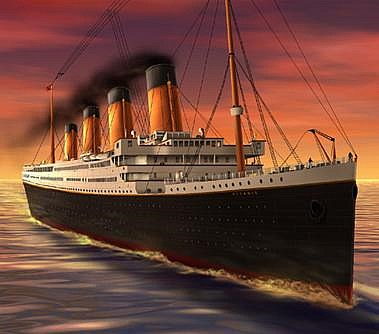

## Table of Contents

1. [Objective](#section1)<br>
2. [Importing Packages and Collecting Data](#section2)
3. [Data Profiling & Preprocessing](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
    - 3.3 [Post Profiling](#section303)<br/>
4. [Analysis Through Data Visualization](#section4)
    - 4.1 [What is Total Count of Survivals and Victims?](#section401)<br/>
    - 4.2 [Which Gender has more Survival rate?](#section402)<br/>
    - 4.3 [What is Survival rate based on Person type(Male,female,Child)](#section403)<br/>
    - 4.4 [Did Economy Class had an impact on Survival?](#section404)<br/>
    - 4.5 [What is the Survival probaility based on Embarkment of Passengers?](#section405)<br/>
    - 4.6 [How is Fare distributed for the Passengers?](#section406)<br/>
    - 4.7 [What was Average Fare by Pclass & Embark location?](#section407)<br/>
    - 4.8 [ Segment Age in bins with size of 20.Also Correlate Age with Survival.](#section408)<br/>
    - 4.9 [ Did Solo Traveller has less chances of Survival?](#section409)<br/>
    - 4.10 [How did Total family size affected Survival Count?](#section410)<br/>
    - 4.11 [How can you correlate Pclass/Age/fare with Survival rate?](#section411)<br/>
    - 4.12 [Which features had most Impact on Survival rate? ](#section412)<br/>
5. [Conclusions](#section5)<br/>  

# **Objective**

The objective here is to conduct Exploratory data analysis **(EDA)** on the Titanic Dataset in order to gather insights and evenutally predicting survior on basics of factors like Class ,Sex , Age , Gender ,Pclass etc.

**About Event**

The RMS Titanic was a British passenger liner that **sank** in the **North Atlantic Ocean** in the early morning hours of **15 April 1912**, after it collided with an iceberg during its maiden voyage from **Southampton** to **New York City**. There were an estimated **2,224** passengers and crew aboard the ship, and more than **1,500** died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
This sensational tragedy shocked the international community and led to better safety regulations for ships.




 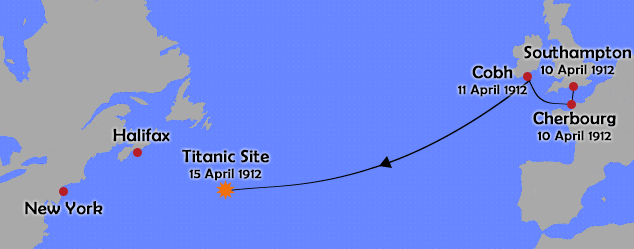

# Data Description

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Survival (0 = No; 1 = Yes)                                |  
| Pclass        | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)               | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
|Embarkment     | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [115]:
import numpy as np                # For Linear Algebra
import pandas as pd               # For Data Manipulation
import matplotlib.pyplot as plt   # For 2D Visualization 
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
sns.set()

# Importing Data

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/afzalshah29/Exploratory-Data-Analysis/main/titanic_train.txt")

In [3]:
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
titanic_data.columns            #seeing columns names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_data.head(10) # getting top 10 row from data set

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
titanic_data.tail(10)         # getting bottom 10 row from data set

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

# **Examining Data**

In [7]:
titanic_data.shape  # shows total numbers of columns & rows in the data set

(891, 12)

In [8]:
titanic_data.info()  #getting some information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.describe()     # describe() is only work for numerical columns

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200


**Insights**:

1.Total samples are **891** or **40%** of the actual number of passengers on board the Titanic **(2,224)**

2.Survived is a categorical feature with 0 or 1 values

3.Around **38%** samples survived representative of the actual survival rate at **32%**

4.Fares varied significantly with few passengers (<1%) paying as high as $512.

5.Few elderly passengers (<1%) within age range **65-80**.


# **Data Profiling**

By pandas profiling, an interactive HTML report gets generated which contains all the information about the columns of the dataset, like the counts and type of each column.

1.Detailed information about each column, coorelation between different columns and a sample of dataset

2.It gives us visual interpretation of each column in the data

3.Spread of the data can be better understood by the distribution plot

4.Grannular level analysis of each column.

In [10]:
Data_Profiling = ProfileReport(titanic_data, title = "Exploratory Data Analysis On Historic Diaster The Titanic Wreck")

In [11]:
Data_Profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
Data_Profiling.to_file(output_file="Titanic_before_preprocessing.html")  # save the file (it's save as an html file)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

1. Check for Errors and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 

**Checking null or empty values in Data**

In [13]:
miss = titanic_data.isnull().sum()           # finding where valeu is null
miss

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Finding Total Percentage of Null Value in each columns

miss_per = (titanic_data.isnull().sum()/len(titanic_data))*100
miss_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
# Concatenate the Total Null Value & Total Perentage (%) Value

miss_data = pd.concat([miss,miss_per], axis=1, keys=['Total', '%'])

In [16]:
miss_data

Total          %
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467

**The Age, Cabin and Embarked have null values. Lets fix them**

# Filling missing age by median

In [17]:
new_age= titanic_data.Age.median()
new_age

28.0

In [18]:
titanic_data.Age.fillna(new_age, inplace=True)

In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Filling missing Embarked by mode**

In [20]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [21]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [22]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### **Cabin feature may be dropped as it is highly incomplete or contains many null values**

In [23]:
# Droping Cabin Columns Due to large Null values
titanic_data.drop('Cabin', axis=1, inplace=True)

In [24]:
titanic_data.isnull().sum() # now there no cabin coulmns

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **PassengerId  Feature may be dropped from training dataset as it does not contribute to survival**

In [25]:
titanic_data.drop('PassengerId', axis=1, inplace=True)

In [26]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### **Ticket feature may be dropped down**

In [27]:
titanic_data.drop('Ticket', axis=1, inplace=True)

In [28]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Creating New Fields**

1. Create New Age Bands to improve  prediction Insights

2. Create a new feature called Family based on Parch and SibSp to get total count of family members on board

3. Create a Fare range feature if it helps our analysis

**AGE-BAND**

In [29]:
titanic_data['Age_Band']=0
titanic_data.loc[titanic_data['Age']<=1, 'Age_Band']="Infant"
titanic_data.loc[(titanic_data['Age']>1)&(titanic_data['Age']<=12), 'Age_Band']="Children"
titanic_data.loc[titanic_data['Age']>12, 'Age_Band']="Adults"

In [30]:
titanic_data.head(5)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_Band  
0    male  22.0      1      0   7.2500        S   Adults  
1  female  38.0      1      0  71.2833        C   Adults  
2  female  26.0      0      0   7.9250        S   Adults  
3  female  35.0      1      0  53.1000        S   Adults  
4    male  35.0      0      0   8.0500        S   Adults

**Fare-Band**

In [31]:
titanic_data['Fare_Band']=0
titanic_data.loc[(titanic_data['Fare']>=0)&(titanic_data['Fare']<=10), 'Fare_Band']=1
titanic_data.loc[(titanic_data['Fare']>=10)&(titanic_data['Fare']>=15), 'Fare_Band']=2
titanic_data.loc[(titanic_data['Fare']>=15)&(titanic_data['Fare']>=35), 'Fare_Band']=3
titanic_data.loc[titanic_data['Fare']>35, 'Fare_Band']= 4


In [32]:
titanic_data.head(5)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_Band  Fare_Band  
0    male  22.0      1      0   7.2500        S   Adults          1  
1  female  38.0      1      0  71.2833        C   Adults          4  
2  female  26.0      0      0   7.9250        S   Adults          1  
3  female  35.0      1      0  53.1000        S   Adults          4  
4    male  35.0      0      0   8.0500        S   Adults          1

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

- In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

In [33]:
titanic_data['Title']=titanic_data.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_data['Title'],titanic_data['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

- We can replace many titles with a more common name or classify them as Rare.

In [34]:
titanic_data['Title']=titanic_data['Title'].replace(['Capt', 'Col','Countess','Don','Dr','Jonkheer',
                                                     'Lady','Major','Rev','Sir','Dona'],'Rare')

titanic_data['Title']=titanic_data['Title'].replace('Mlle','Miss')
titanic_data['Title']=titanic_data['Title'].replace('Ms','Miss')
titanic_data['Title']=titanic_data['Title'].replace('Mme', 'Mrs')

titanic_data[['Title','Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

In [35]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
titanic_data['Title']=titanic_data['Title'].map(title_mapping)
titanic_data['Title']=titanic_data['Title'].fillna(0)
                 
titanic_data.head()
                 

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Age_Band  Fare_Band  Title  
0    male  22.0      1      0   7.2500        S   Adults          1      1  
1  female  38.0      1      0  71.2833        C   Adults          4      3  
2  female  26.0      0      0   7.9250        S   Adults          1      2  
3  female  35.0      1      0  53.1000        S   Adults          4      3  
4    male  35.0      0      0   8.0500        S   Adults          1      1


**Insights**

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

### Decision
#### We decide to retain the new Title feature for model training


### Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

- Converting Sex feature to a new feature called Gender where female=1 and male=0.

In [36]:
titanic_data['Sex']=titanic_data['Sex'].map( {'female':1,'male':0} ).astype(int)
titanic_data.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch     Fare Embarked Age_Band  Fare_Band  Title  
0  22.0      1      0   7.2500        S   Adults          1      1  
1  38.0      1      0  71.2833        C   Adults          4      3  
2  26.0      0      0   7.9250        S   Adults          1      2  
3  35.0      1      0  53.1000        S   Adults          4      3  
4  35.0      0      0   8.0500        S   Adults          1      1

**Extracting Titles Now we can drop down Name feature**

In [37]:
titanic_data.drop('Name', axis=1, inplace=True)

In [38]:
titanic_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked Age_Band  \
0         0       3    0  22.0      1      0   7.2500        S   Adults   
1         1       1    1  38.0      1      0  71.2833        C   Adults   
2         1       3    1  26.0      0      0   7.9250        S   Adults   
3         1       1    1  35.0      1      0  53.1000        S   Adults   
4         0       3    0  35.0      0      0   8.0500        S   Adults   

   Fare_Band  Title  
0          1      1  
1          4      3  
2          1      2  
3          4      3  
4          1      1

In [39]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0, 'C':1,'Q':2}).astype(int)
titanic_data.head()
                                            

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked Age_Band  \
0         0       3    0  22.0      1      0   7.2500         0   Adults   
1         1       1    1  38.0      1      0  71.2833         1   Adults   
2         1       3    1  26.0      0      0   7.9250         0   Adults   
3         1       1    1  35.0      1      0  53.1000         0   Adults   
4         0       3    0  35.0      0      0   8.0500         0   Adults   

   Fare_Band  Title  
0          1      1  
1          4      3  
2          1      2  
3          4      3  
4          1      1

- We can also create an artificial feature combining Pclass and Age.

In [40]:
titanic_data['Age*Class']= titanic_data.Age * titanic_data.Pclass

titanic_data.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

Age*Class   Age  Pclass
0       66.0  22.0       3
1       38.0  38.0       1
2       78.0  26.0       3
3       35.0  35.0       1
4      105.0  35.0       3
5       84.0  28.0       3
6       54.0  54.0       1
7        6.0   2.0       3
8       81.0  27.0       3
9       28.0  14.0       2

# Post Pandas Profiling : Checking Data after data preparation

In [41]:
data_profile = ProfileReport(titanic_data, title = "Exploratory Data Analysis On Historic Diaster The Titanic Wreck")

In [42]:
data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
data_profile.to_file(output_file = "Exploratory Data Analysis On Historic Diaster The Titanic Wreck")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization

4.1 **What is Total Count of Survivals and Victims?**

In [44]:
titanic_data.groupby(['Survived'])['Survived'].count()  # similar functions unique(),sum(),mean() etc

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

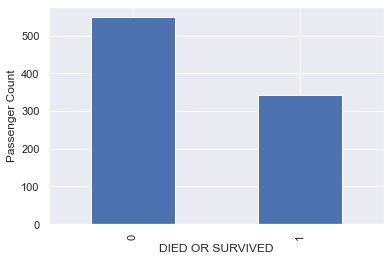

In [45]:
plt = titanic_data.Survived.value_counts().plot(kind='bar')
plt.set_xlabel("DIED OR SURVIVED")
plt.set_ylabel("Passenger Count")

**Insights** 
- Only 342 Passengers Survived out of 891
- Majority Died which conveys there were less chances of Survival

4.2 **Which gender has more survival rate?**

In [46]:
titanic_data.groupby(['Survived','Sex']).count()["Age"]

Survived  Sex
0         0      468
          1       81
1         0      109
          1      233
Name: Age, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

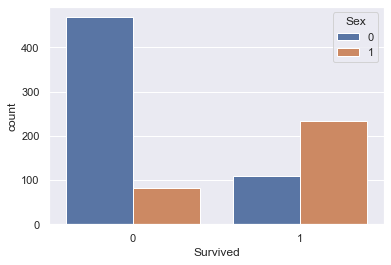

In [47]:
sns.countplot('Survived', data=titanic_data, hue='Sex')

<AxesSubplot:xlabel='Sex'>

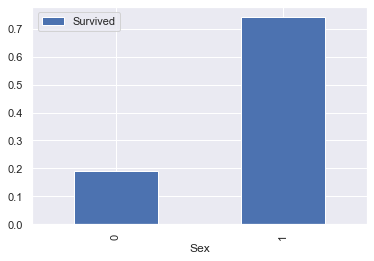

In [48]:
titanic_data[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar')

**Insights**

-  Female has better chances of Survival "LADIES FIRST"
-  There were more males as compared to females ,but most of them died.

4.3 **What is Survival rate based on Person type?**

In [49]:
titanic_data.groupby(['Survived', 'Age_Band']).count()["Sex"]

Survived  Age_Band
0         Adults      520
          Children     27
          Infant        2
1         Adults      302
          Children     28
          Infant       12
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Adult survival rate')

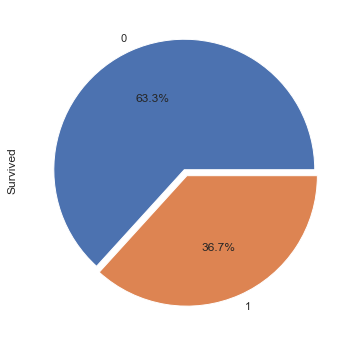

In [50]:
titanic_data[titanic_data["Age_Band"] == "Adults"].Survived.groupby(titanic_data.Survived).count().plot(kind='pie', figsize=(6,6), explode=[0,0.05], autopct ='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.set_title("Adult survival rate")

------------------------------------------**ADULT-SURVIVAL RATE**--------------------------------------------------------------

Text(0.5, 1.0, 'Child Survival Rate')

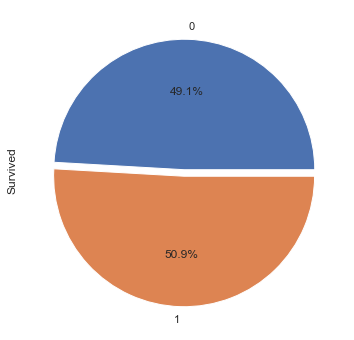

In [51]:
titanic_data[titanic_data["Age_Band"] == "Children"].Survived.groupby(titanic_data.Survived).count().plot(kind='pie', figsize=(6,6), explode =(0,0.05), autopct = '%1.1f%%')
plt.axis('equal')
#plt.legend("DIED","SURVIVED")
plt.set_title("Child Survival Rate")

------------------------------------------**CHILD-SURVIVAL RATE**--------------------------------------------------------------

Text(0.5, 1.0, 'Infant Survival Rate')

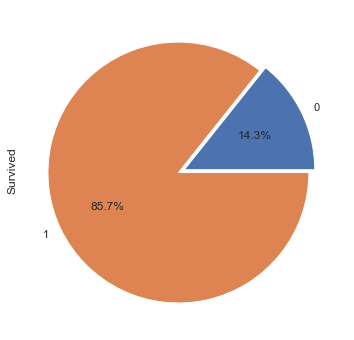

In [52]:
titanic_data[titanic_data["Age_Band"] == "Infant"].Survived.groupby(titanic_data.Survived).count().plot(kind='pie', figsize=(6,6), explode=(0,0.05), autopct='%1.1F%%')
plt.axis('equal')
#plt.legend("DIED", "SURVIVED")
plt.set_title("Infant Survival Rate")

**Insights** 

- Majority Passengers  were  Adults

- Almost half of the total number of children survived.

- Most of the Adults failed to Survive

- More than 85percent of Infant Survived


4.4 **Did Economy Class had an impact on survival rate?**

In [53]:
titanic_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

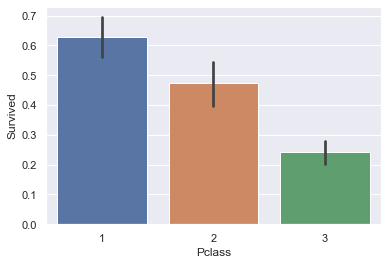

In [54]:
sns.barplot(x='Pclass', y ='Survived', data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

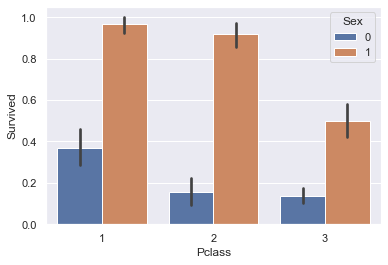

In [55]:
 sns.barplot( x = 'Pclass', y = 'Survived', data=titanic_data, hue="Sex")

**Insights**

- Most of the passengers travelled in Third class but only 24per of them survived

- If we talk about survival ,more passengers in First class survived and again female given more priority

- Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival as compared to Class 2 and 3.

4.5 **What is Survival Propability based on Embarkment of passengers?**

Titanic’s first voyage was to New York before sailing to the Atlantic Ocean it picked passengers from three ports Cherbourg(C), Queenstown(Q), Southampton(S). Most of the Passengers in Titanicic embarked from the port of Southampton.Lets see how embarkemt affected survival probability.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

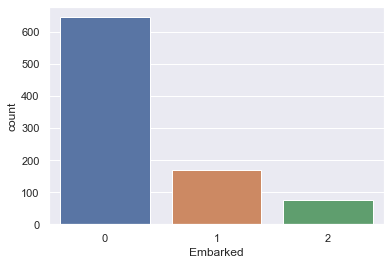

In [56]:
sns.countplot(x='Embarked', data=titanic_data)

Text(0, 0.5, 'Survval Probability')

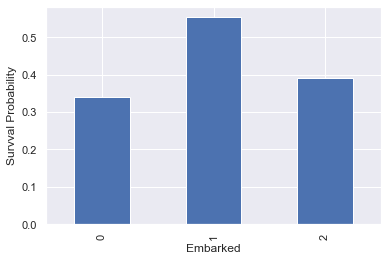

In [57]:
plt = titanic_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel("Embarked")
plt.set_ylabel("Survval Probability")

**Gender Survival based on Embarkment and Pclass**

In [58]:
pd.crosstab([titanic_data.Sex, titanic_data.Survived, titanic_data.Pclass],[titanic_data.Embarked], margins=True)

Embarked               0    1   2  All
Sex Survived Pclass                   
0   0        1        51   25   1   77
             2        82    8   1   91
             3       231   33  36  300
    1        1        28   17   0   45
             2        15    2   0   17
             3        34   10   3   47
1   0        1         2    1   0    3
             2         6    0   0    6
             3        55    8   9   72
    1        1        48   42   1   91
             2        61    7   2   70
             3        33   15  24   72
All                  646  168  77  891

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

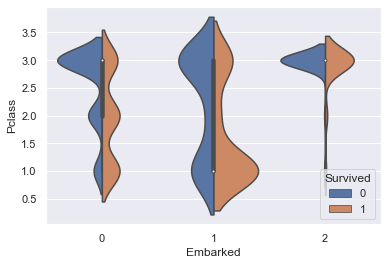

In [59]:
sns.violinplot(x='Embarked', y='Pclass', hue = 'Survived', data=titanic_data, split=True)

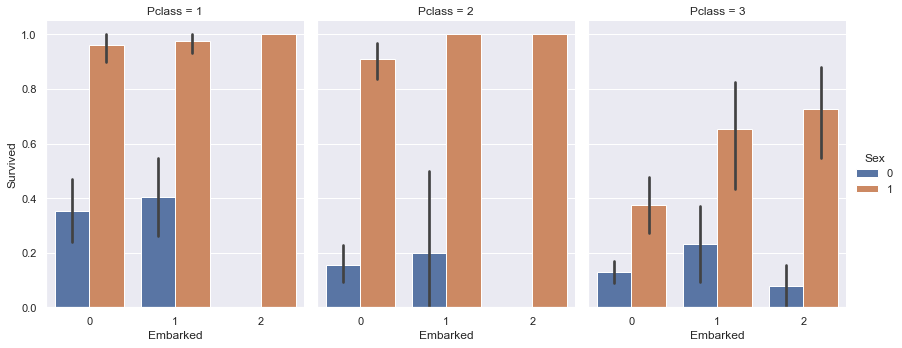

In [60]:
sns.catplot(x='Embarked', y = 'Survived', hue='Sex', col = 'Pclass', aspect=.8, kind='bar', data =titanic_data)

**Insights:**

- Most Passengers from port C Survived.

- Most Passengers were from  Southampton(S).

- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

- Males had better survival rate in Port C when compared for  S and Q ports.
- Females had least Survival rate in Pclass 3

4.6 **How is Fare distributed for  Passesngers?**

In [61]:
titanic_data['Fare'].min()

0.0

In [62]:
titanic_data['Fare'].max()

512.3292

In [63]:
titanic_data[['Fare_Band', 'Survived']].groupby(['Fare_Band'], as_index=False).mean().sort_values(by='Fare_Band', ascending=True)

Fare_Band  Survived
0          0  0.388430
1          1  0.199405
2          2  0.446809
3          3  0.000000
4          4  0.621212

In [64]:
titanic_data.groupby(["Fare_Band", "Survived"])["Survived"].count()

Fare_Band  Survived
0          0            74
           1            47
1          0           269
           1            67
2          0           130
           1           105
3          0             1
4          0            75
           1           123
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


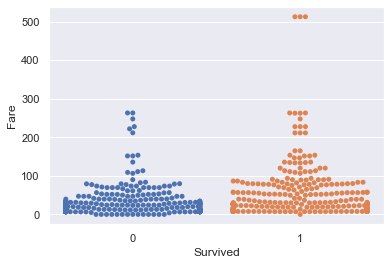

In [66]:
sns.swarmplot(x = "Survived", y="Fare", data=titanic_data);

**Insights**

- Majority Passenger's fare lies in 0-100 dollars range
- Passengers who paid more Fares had more chances of Survival
- Fare as high as 514 dollars was purcharsed by very few.(Outlier)

4.7 **What was Average fare by Pclass & Embark location?**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

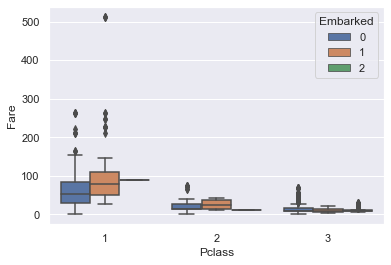

In [68]:
sns.boxplot(x='Pclass', y='Fare', data=titanic_data, hue="Embarked")

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

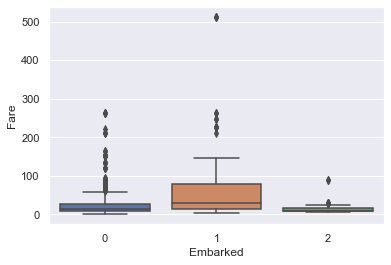

In [71]:
sns.boxplot(x='Embarked', y='Fare', data =titanic_data)

**Insights**

- First Class Passengers paid major part of total Fare.
- Passengers who Embarked from Port C paid Highest Fare

4.8 **Segment Age in bins with size of 10**

Text(0.5, 1.08, 'Age Distribution of Titanic Passengers')

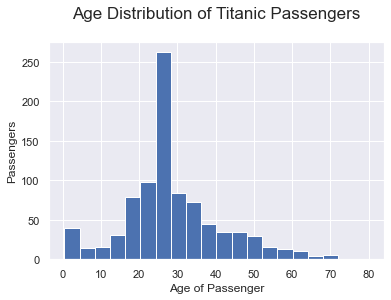

In [74]:
plt=titanic_data['Age'].hist(bins=20)
plt.set_ylabel("Passengers")
plt.set_xlabel("Age of Passenger")
plt.set_title('Age Distribution of Titanic Passengers',size=17, y=1.08)

Insights:
- The youngest passenger on the Titanic were toddlers under 6 months
- The oldest were of 80 years of age. 
- The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

**Lets see how Age has correlation with Survival**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

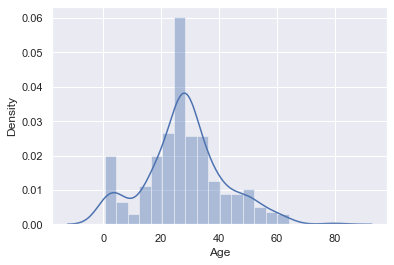

In [76]:
sns.distplot(titanic_data[titanic_data["Survived"]==1]["Age"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

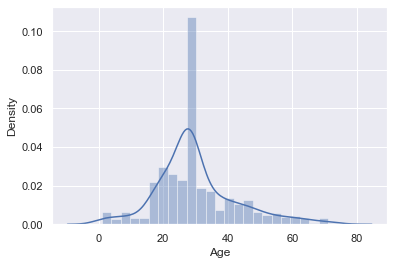

In [77]:
sns.distplot(titanic_data[titanic_data["Survived"]==0]["Age"])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

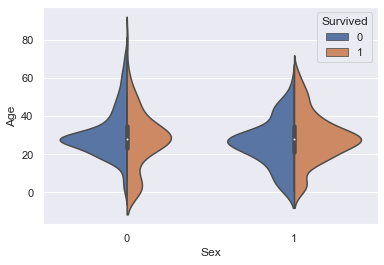

In [78]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True)

**Insights**
- Most of the passengers died.
- Majority of passengers were between 25-40,most of them died
- Female are more likely to survival 

4.9 **Did Solo Passenger has less chances of Survival ?**

In [79]:
titanic_data['FamilySize']=0
titanic_data['FamilySize']=titanic_data['Parch']+titanic_data['SibSp']
titanic_data['SoloPassenger']=0
titanic_data.loc[titanic_data.FamilySize==0, 'SoloPassenger']=1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


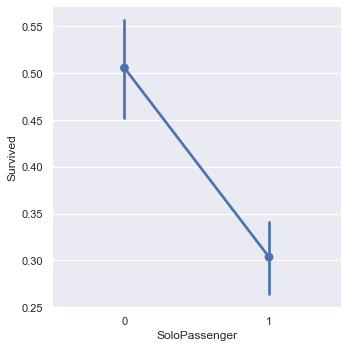

In [82]:
sns.factorplot(x='SoloPassenger', y='Survived', data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='SoloPassenger'>

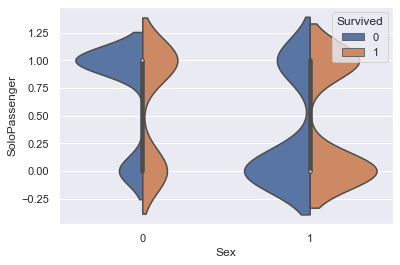

In [85]:
sns.violinplot(y='SoloPassenger', x='Sex', hue='Survived', data=titanic_data, split=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


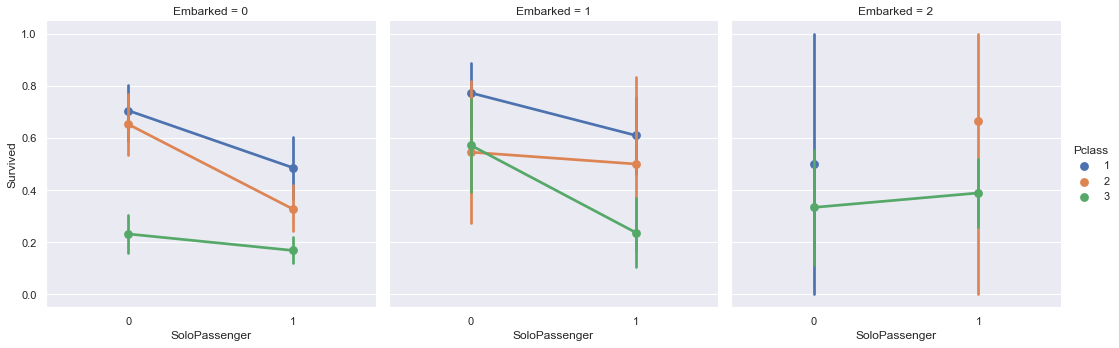

In [89]:
sns.factorplot(x='SoloPassenger', y='Survived', hue='Pclass', col='Embarked', data=titanic_data)

**Insights**

- Most of the Passengers were travelling Solo and most of them died
- Solo Females were more likely to Survive as compared to males
- Passengers Class have a positive correlation with Solo Passenger Survival
- Passengers Embarked from Port Q had Fifty -Fifty  Chances of Survival 


4.10 **How did total family size affected Survival Count**?

In [91]:
titanic_data['FamilySize']=titanic_data['SibSp']+titanic_data['Parch']+1
titanic_data[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

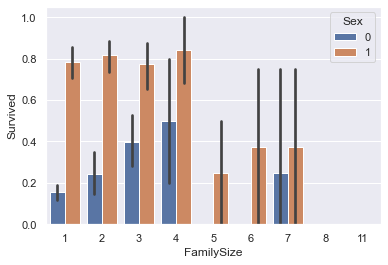

In [93]:
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=titanic_data)

**Insights**
- Both men and women had a massive drop of survival with a FamilySize over 4. 
- The chance to survive as a man increased with FamilySize until a size of 4
- Men are not likely to Survive with FamilySize 5 and 6
- Big Size Family less likihood of Survival

4.11 **How can you correlate Pclass/Age/Fare with Survival rate?**

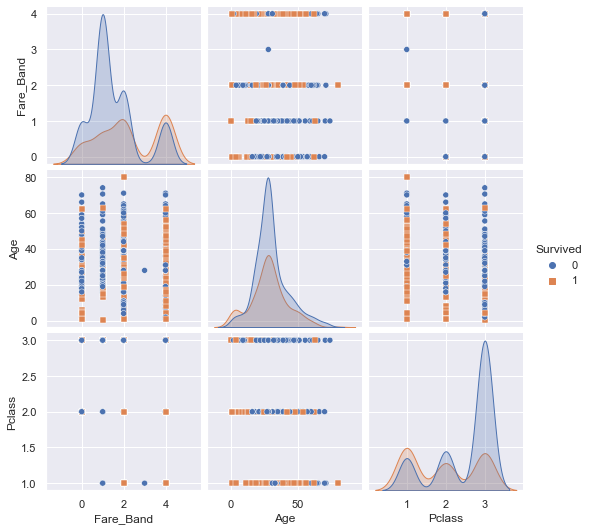

In [101]:
sns.pairplot(titanic_data[["Fare_Band","Age","Pclass","Survived"]], vars= ["Fare_Band", "Age", "Pclass"], hue="Survived", dropna=True,markers=["o","s"])

Insights:

- Fare and Survival has positive correlation

- We cannt relate age and Survival as majority of travellers were of mid age

- Higher Class Passengers had more likeihood of Survival


4.12 **Which features had most impact on Survival rate?**

<AxesSubplot:>

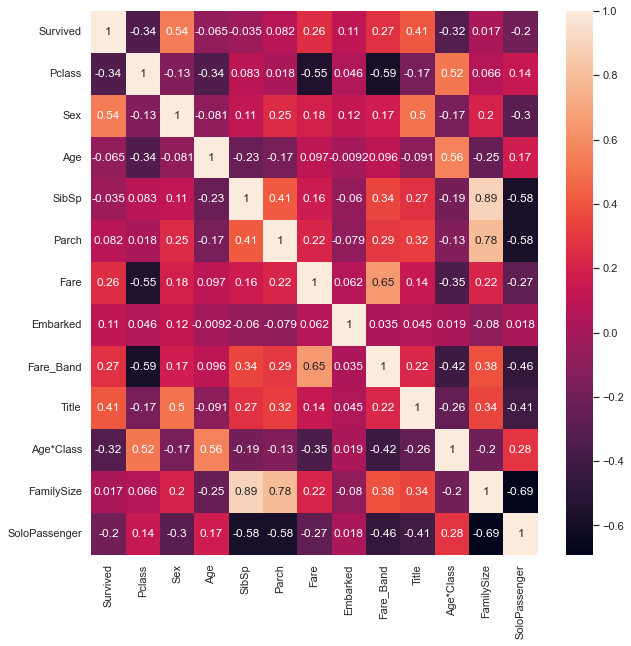

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(),annot=True)

**Insights**:

- Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
- All the features are not necessary to predict Survival
- More Features creates Complexitity 
- Fare has positive Correlation
- For Females major Survival Chances , only for port C males had more likeihood of Survival.


# Conclusion : "If you were young female travelling in First Class and embarked from port -C then you have best chances of Survival in Titanic"

-  Most of the Passengers Died
- "Ladies & Children First" i.e **76% of Females and 16% of Children** Survived
-  Gender , Passenger type & Classs are mostly realted to Survival.
-  Survival rate diminishes significantly for Solo  Passengers
-  Majority of Male Died
-  Males with Family had better Survival rate as compared to Solo Males